## RUSSIAN TROLL TWEETS CLUSTERING
### K-Modes
#### CSCI 113i Group 3

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes
# Import module for data visualization
from plotnine import *
import plotnine



In [2]:
# Load russian troll tweet dataset
full_df = pd.read_excel("russian_tweet_cleaned.xlsx", index_col=None)
full_df

,account_type,external_author_id,author,content,region,language,publish_date,publish_year,publish_month,publish_day,following,followers,updates,post_type,retweet,account_category,new_june_2018,tweet_id,follower_change
0,Russian,2499828724,_ANNA_SANNA_,Омичи отметят День молодежи капойэрой и карибс...,Unknown,Russian,2015-06-26 13:11:00,2015,6,26,664,151,1504,RETWEET,1,NonEnglish,1,614420771641925632,0
1,Russian,2499828724,_ANNA_SANNA_,Маркин о желании Пономарева «дать по морде люд...,Unknown,Russian,2015-07-15 17:56:00,2015,7,15,661,152,1528,RETWEET,1,NonEnglish,1,621377816899227648,1
2,Russian,2499828724,_ANNA_SANNA_,Биржевой курс евро опустился ниже 62 руб. htt...,Unknown,Russian,2015-07-16 10:53:00,2015,7,16,660,152,1532,RETWEET,1,NonEnglish,1,621633676607160320,0
3,Russian,2499828724,_ANNA_SANNA_,Адвокат: Савченко этапируют из Москвы http://t...,Unknown,Russian,2015-07-16 14:31:00,2015,7,16,660,152,1536,RETWEET,1,NonEnglish,1,621688618629898240,0
4,Russian,2499828724,_ANNA_SANNA_,Крушение Boeing-777 будут расследовать еще сем...,Unknown,Russian,2015-07-17 15:33:00,2015,7,17,660,151,1540,RETWEET,1,NonEnglish,1,622066579740721152,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Left,1701955429,ZZZACHARYZZZ,👇🏾 A mood https://t.co/elCscMpdeO,United States,English,2017-08-08 19:05:00,2017,8,8,792,916,6758,RETWEET,1,LeftTroll,0,894997896533336064,0
1048571,Left,1701955429,ZZZACHARYZZZ,Lmao this picture https://t.co/iazZgZ3S2q,United States,English,2017-08-08 21:05:00,2017,8,8,792,915,6759,RETWEET,1,LeftTroll,0,895028320307482624,-1
1048572,Left,1701955429,ZZZACHARYZZZ,Hey u guys. I’m so excited for the State of th...,United States,English,2017-08-08 21:06:00,2017,8,8,792,915,6760,RETWEET,1,LeftTroll,0,895028350460284928,0
1048573,Left,1701955429,ZZZACHARYZZZ,*Find out who's playing from your area. Tune i...,United States,English,2017-08-08 23:06:00,2017,8,8,792,916,6761,RETWEET,1,LeftTroll,0,895058767133515776,1


In [3]:
# Replace columns 
full_df["publish_year"] = full_df["publish_year"].replace([2015, 2016, 2017], ['2015','2016','2017'])
full_df["publish_month"] = full_df["publish_month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])
full_df["retweet"] = full_df["retweet"].replace([0, 1], ['No','Yes'])
full_df["new_june_2018"] = full_df["new_june_2018"].replace([0,1], ['No','Yes'])
full_df["post_type"] = full_df["post_type"].replace(['QUOTE_TWEET','RETWEET', ''], ['QUOTE_TWEET','RETWEET','ORIGINAL'])
full_df.select_dtypes('object').nunique()

account_type            18
author                1004
content             959205
region                  24
language                56
publish_year             7
publish_month           12
post_type                2
retweet                  2
account_category         8
new_june_2018            2
dtype: int64

In [4]:
# Remove columns that are not categorical
full_df2 = full_df.drop(columns=["content","author","publish_year","publish_month"])
full_df2 = full_df2.dropna()
cols = full_df2.select_dtypes('object').columns
cat_troll_df = full_df2[cols]

cat_troll_df    

,account_type,region,language,post_type,retweet,account_category,new_june_2018
0,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
1,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
2,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
3,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
4,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
...,...,...,...,...,...,...,...
1048570,Left,United States,English,RETWEET,Yes,LeftTroll,No
1048571,Left,United States,English,RETWEET,Yes,LeftTroll,No
1048572,Left,United States,English,RETWEET,Yes,LeftTroll,No
1048573,Left,United States,English,RETWEET,Yes,LeftTroll,No


In [5]:
cat_troll_dfMatrix = cat_troll_df.loc[:,].to_numpy()

In [6]:
# Generate elbow curve to find optimal K
cost = []
for cluster in range(1, 6):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(cat_troll_dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [7]:
# Data frame of clusters and cost
df_cost = pd.DataFrame({'Cluster': range(1, 6), 'Cost': cost})
df_cost

,Cluster,Cost
0,1,777703.0
1,2,420816.0
2,3,307444.0
3,4,235638.0
4,5,205980.0


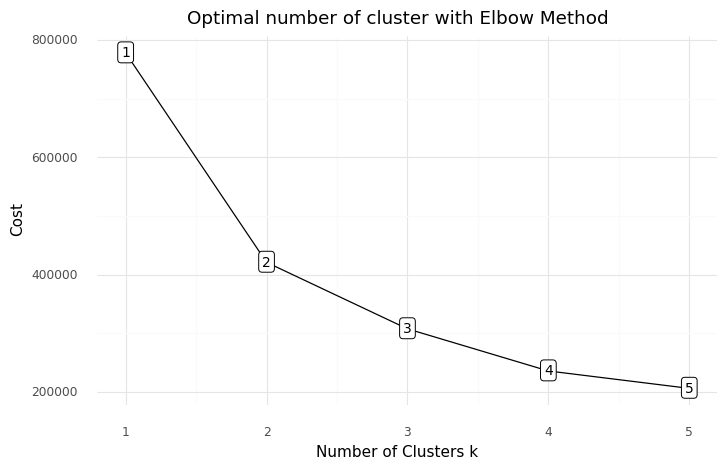

<ggplot: (184828058433)>

In [8]:
# Plot elbow curve to see the best number of clusters
plt.style.use('ggplot')
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [9]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
clusters = kmodes.fit_predict(cat_troll_dfMatrix)

In [10]:
print("Cluster centroids:")
print(kmodes.cluster_centroids_)
print("Iterations: ",kmodes.n_iter_)
print("Cost: ",kmodes.cost_)


Cluster centroids:
[['Russian' 'Unknown' 'Russian' 'RETWEET' 'Yes' 'NonEnglish' 'Yes']
 ['Left' 'United States' 'English' 'RETWEET' 'Yes' 'LeftTroll' 'No']]
Iterations:  1
Cost:  420816.0


In [11]:
cat_troll_df['Cluster Labels'] = kmodes.labels_
cat_troll_df['Segment'] = cat_troll_df['Cluster Labels'].map({0:'First',1:'Second'})

C:\Users\admin\AppData\Local\Temp\ipykernel_12472\1553722097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\AppData\Local\Temp\ipykernel_12472\1553722097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
cat_troll_df['Segment'] = cat_troll_df['Segment'].astype('category')
cat_troll_df['Segment'] = cat_troll_df['Segment'].cat.reorder_categories(['First', 'Second'])

C:\Users\admin\AppData\Local\Temp\ipykernel_12472\3575719049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\admin\AppData\Local\Temp\ipykernel_12472\3575719049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
cat_troll_df

,account_type,region,language,post_type,retweet,account_category,new_june_2018,Cluster Labels,Segment
0,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes,0,First
1,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes,0,First
2,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes,0,First
3,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes,0,First
4,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes,0,First
...,...,...,...,...,...,...,...,...,...
1048570,Left,United States,English,RETWEET,Yes,LeftTroll,No,1,Second
1048571,Left,United States,English,RETWEET,Yes,LeftTroll,No,1,Second
1048572,Left,United States,English,RETWEET,Yes,LeftTroll,No,1,Second
1048573,Left,United States,English,RETWEET,Yes,LeftTroll,No,1,Second


In [17]:
# Columns for centroids
remove_col = ['Cluster Labels', 'Segment']
cols = [col for col in cat_troll_df if col not in remove_col]
cols

['account_type',
 'region',
 'language',
 'post_type',
 'retweet',
 'account_category',
 'new_june_2018']

In [18]:
index = ['First Cluster', 'Second Cluster']
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,account_type,region,language,post_type,retweet,account_category,new_june_2018
First Cluster,Russian,Unknown,Russian,RETWEET,Yes,NonEnglish,Yes
Second Cluster,Left,United States,English,RETWEET,Yes,LeftTroll,No
